In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
import random
%matplotlib inline

In [14]:
BASE_PATH = 'crop_img/img/CLOTHING/Blouse/'
ids = sorted([x for x in os.listdir(BASE_PATH)])

In [18]:
ids[:5]

['id_00004848', 'id_00005025', 'id_00005661', 'id_00005855', 'id_00006033']

## make triplet
- anchor(consumer_domain)
- positive(shop_domain)
- negative(shop_domain)

In [30]:
triplets=[]
for id_ in ids:
    files = sorted([BASE_PATH+id_+'/'+x for x in os.listdir(BASE_PATH+id_)])
    con = sorted([x for x in files if 'comsumer' in x])
    shop = sorted([x for x in files if 'shop' in x ])
    combs = list(itertools.product(tuple(con),tuple(shop)))
    for comb in combs:
        comb = list(comb)
        neg_id = random.choice([x for x in ids if x != id_])
        neg_file = random.choice([BASE_PATH+neg_id+'/'+x for x in os.listdir(BASE_PATH+neg_id) if 'shop' in x])
        comb.append(neg_file)
        triplets.append(comb)
# print(triplets)

### show Triplet Samples

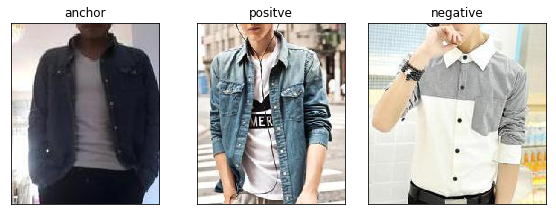

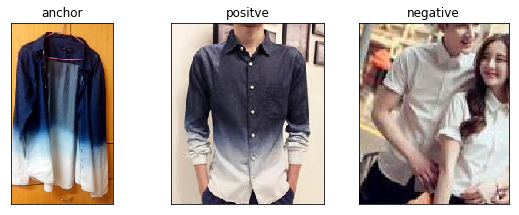

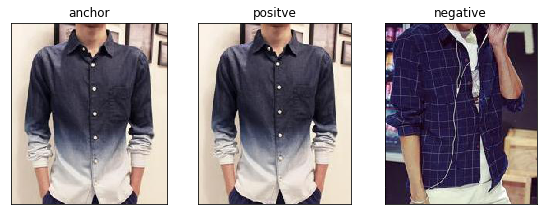

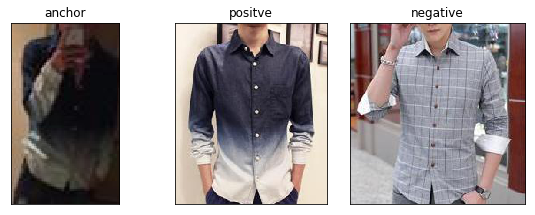

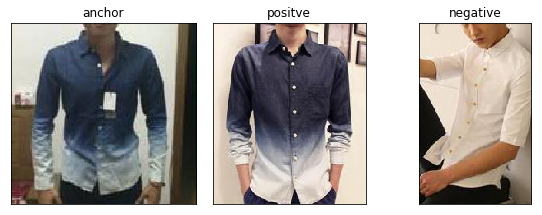

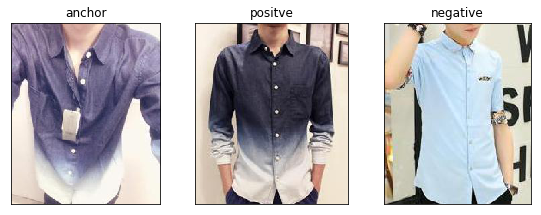

In [70]:
target = triplets[:6]
for triplet in target:
#     print(triplet)
    # load
    anc = np.array(Image.open(triplet[0]))
    pos = np.array(Image.open(triplet[1]))
    neg = np.array(Image.open(triplet[2]))
    # settings
    plt.figure(figsize=(10,20))
    plt.subplots_adjust(wspace=0, hspace=0)
    # plot anchor
    plt.subplot(len(target),3,1)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    plt.imshow(anc)
    plt.title('anchor')
    # plot positive
    plt.subplot(len(target),3,2)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    plt.imshow(pos)
    plt.title('positve')
    # plot negative
    plt.subplot(len(target),3,3)
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.tick_params(color='white')
    plt.imshow(neg)
    plt.title('negative')
plt.savefig('./readme_imgs/tripletSample.png',bbox_inches='tight')
plt.show()

### Output as CSV file

In [73]:
triplets[:5]

[['crop_img/img/CLOTHING/Blouse/id_00004848/comsumer_01.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00004848/shop_01.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00011359/shop_01.jpg'],
 ['crop_img/img/CLOTHING/Blouse/id_00005025/comsumer_01.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00005025/shop_01.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00014150/shop_01.jpg'],
 ['crop_img/img/CLOTHING/Blouse/id_00005025/comsumer_02.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00005025/shop_01.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00018558/shop_01.jpg'],
 ['crop_img/img/CLOTHING/Blouse/id_00005025/comsumer_03.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00005025/shop_01.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00008848/shop_01.jpg'],
 ['crop_img/img/CLOTHING/Blouse/id_00005025/comsumer_04.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00005025/shop_01.jpg',
  'crop_img/img/CLOTHING/Blouse/id_00019153/shop_01.jpg']]

In [74]:
import csv
with open('blouse_triplets.txt','w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(triplets)

### Save as np.array

In [ ]:
blouse_triplets = []
for triplet in triplets:
    anc = np.array(Image.open(triplet[0]))
    pos = np.array(Image.open(triplet[1]))
    neg = np.array(Image.open(triplet[2]))
    tri = [anc,pos,neg]
    np_triplets.append(tri)
blouse_triplets = np.array(blouse_triplets)
np.save('./np_datasets/Blouse',blouse_triplets)